# Importing Necessary Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential,models,layers
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import pathlib
import os
import PIL
from tqdm import tqdm
import random

# Understanding the Dataset

In [39]:
classes=[]
train_data_path='../input/intel-image-classification/seg_train/seg_train'
for i in os.listdir(train_data_path):
    classes.append(i)

#### There are total 6 target classes

In [40]:
classes

['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier']

In [41]:
train_img_path=pathlib.Path(train_data_path)
train_images=list(train_img_path.glob('*/*'))

#### Finding the first images in the training data

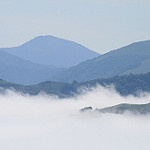

In [42]:
PIL.Image.open(train_images[0])

In [43]:
buildings=pathlib.Path('../input/intel-image-classification/seg_train/seg_train/buildings')
buildings=list(buildings.glob('*'))
forest=pathlib.Path('../input/intel-image-classification/seg_train/seg_train/forest')
forest=list(forest.glob('*'))
glacier=pathlib.Path('../input/intel-image-classification/seg_train/seg_train/glacier')
glacier=list(glacier.glob('*'))
mountain=pathlib.Path('../input/intel-image-classification/seg_train/seg_train/mountain')
mountain=list(mountain.glob('*'))
sea=pathlib.Path('../input/intel-image-classification/seg_train/seg_train/sea')
sea=list(sea.glob('*'))
street=pathlib.Path('../input/intel-image-classification/seg_train/seg_train/street')
street=list(street.glob('*'))

values=[len(buildings),len(forest),len(glacier),len(mountain),len(sea),len(street)]

In [44]:
values

[2191, 2271, 2404, 2512, 2274, 2382]

### Plotting all the partitions of the target classes in the training data 

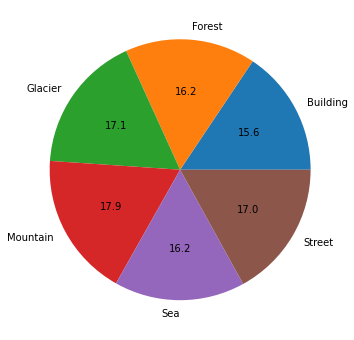

In [45]:
plt.figure(figsize=(8,6))
plt.pie(values,labels=['Building','Forest','Glacier','Mountain','Sea','Street'],autopct='%.1f')
plt.show()

In [46]:
prediction_data_path='../input/intel-image-classification/seg_pred/seg_pred'
validation_data_path='../input/intel-image-classification/seg_test/seg_test'

In [47]:
prediction_img_path=pathlib.Path(prediction_data_path)
validation_img_path=pathlib.Path(validation_data_path)

# Converting the images into datasets

In [48]:
BATCH_SIZE=32
INPUT_SHAPE=(180,180)

In [49]:
datagen1=ImageDataGenerator(rescale=1./255,horizontal_flip=True,zoom_range=0.4,shear_range=0.3)
datagen2=ImageDataGenerator(rescale=1./255)

In [50]:
train_ds=datagen1.flow_from_directory(train_img_path,shuffle=True,target_size=INPUT_SHAPE,batch_size=BATCH_SIZE,class_mode='sparse')

Found 14034 images belonging to 6 classes.


In [51]:
len(train_ds)

439

In [52]:
validation_ds=datagen2.flow_from_directory(validation_img_path,shuffle=True,target_size=INPUT_SHAPE,batch_size=BATCH_SIZE,class_mode='sparse')

Found 3000 images belonging to 6 classes.


In [53]:
prediction_imgs=list(prediction_img_path.glob('*'))

In [54]:
len(prediction_imgs)

7301

In [55]:
def get_data(path):
    X=[]
    for i in path:
        img=load_img(i,target_size=(180,180),color_mode='rgb')
        img=img_to_array(img)
        img=img/255
        X.append(img)
    X=np.asarray(X)
    return X

In [56]:
test_ds=get_data(prediction_imgs)

In [57]:
test_ds.shape

(7301, 180, 180, 3)

# Visualize the data

#### Plotting the first 20 images from the prediction dataset

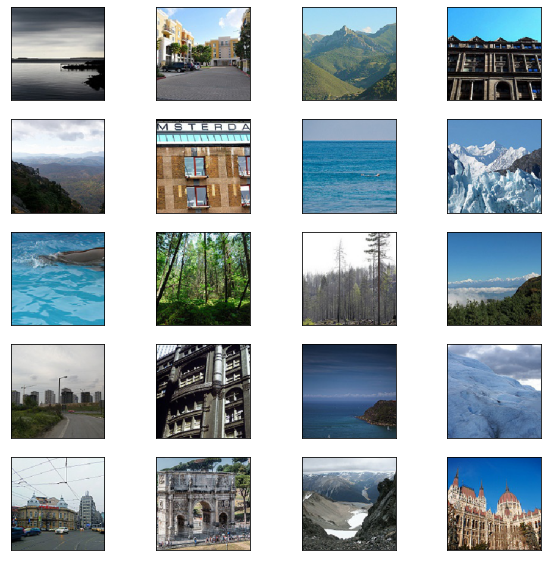

In [58]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(test_ds[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

# Model Creation

In [59]:
INPUT_SHAPE=INPUT_SHAPE+(3,)

In [65]:
cnn=Sequential()
cnn.add(layers.Conv2D(filters=64,kernel_size=(4,4),activation='relu',input_shape=INPUT_SHAPE))
cnn.add(layers.MaxPool2D(pool_size=(2,2)))
cnn.add(layers.Conv2D(filters=128,kernel_size=(4,4),activation='relu'))
cnn.add(layers.MaxPool2D(pool_size=(2,2)))
cnn.add(layers.Conv2D(filters=64,kernel_size=(4,4),activation='relu',))
cnn.add(layers.MaxPool2D(pool_size=(2,2)))
cnn.add(layers.Conv2D(filters=64,kernel_size=(4,4),activation='relu'))
cnn.add(layers.MaxPool2D(pool_size=(2,2)))
cnn.add(layers.Dropout(0.3))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(units=128,activation='relu'))
cnn.add(layers.Dropout(0.4))
cnn.add(layers.Dense(units=6,activation='softmax'))

cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 177, 177, 64)      3136      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 88, 88, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 128)       131200    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 64)        131136    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)       

In [66]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [67]:
history=cnn.fit(train_ds,steps_per_epoch=len(train_ds),epochs=10,validation_data=validation_ds)

Epoch 1/10
439/439 [==============================] - 126s 285ms/step - loss: 1.3471 - accuracy: 0.4270 - val_loss: 0.8770 - val_accuracy: 0.6600
Epoch 2/10
439/439 [==============================] - 123s 281ms/step - loss: 0.9425 - accuracy: 0.6357 - val_loss: 0.7094 - val_accuracy: 0.7307
Epoch 3/10
439/439 [==============================] - 125s 285ms/step - loss: 0.7995 - accuracy: 0.7043 - val_loss: 0.5938 - val_accuracy: 0.7753
Epoch 4/10
439/439 [==============================] - 125s 285ms/step - loss: 0.7319 - accuracy: 0.7263 - val_loss: 0.5423 - val_accuracy: 0.8050
Epoch 5/10
439/439 [==============================] - 125s 284ms/step - loss: 0.6646 - accuracy: 0.7610 - val_loss: 0.5131 - val_accuracy: 0.8130
Epoch 6/10
439/439 [==============================] - 125s 285ms/step - loss: 0.6117 - accuracy: 0.7818 - val_loss: 0.4679 - val_accuracy: 0.8380
Epoch 7/10
439/439 [==============================] - 126s 287ms/step - loss: 0.5627 - accuracy: 0.8000 - val_loss: 0.4547 -

In [73]:
val_loss,val_acc=cnn.evaluate(validation_ds)

94/94 [==============================] - 8s 86ms/step - loss: 0.4274 - accuracy: 0.8603


#### Plotting the loss and accuracy of the training and validation dataset

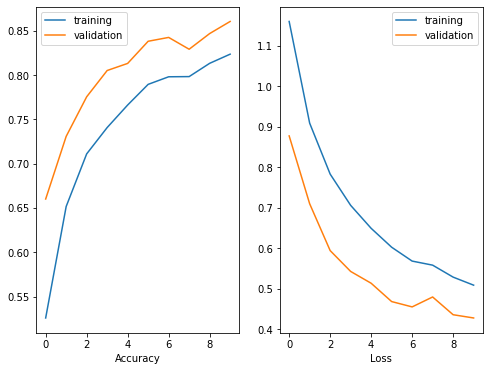

In [94]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='training')
plt.plot(history.history['val_accuracy'],label='validation')
plt.xlabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='training')
plt.plot(history.history['val_loss'],label='validation')
plt.xlabel('Loss')
plt.legend()
plt.show()

#### Applying the model on new images to identify their class

In [77]:
test_ds[0].shape

(180, 180, 3)

In [79]:
predict=cnn.predict(test_ds)

In [81]:
predict=tf.nn.softmax(predict)

In [82]:
predict=np.argmax(predict,axis=1)

In [84]:
labels=['buildings','forest','glacier','mountain','sea','street']

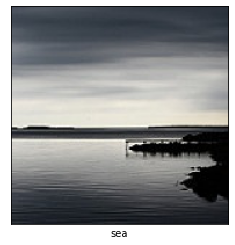

In [91]:
plt.imshow(test_ds[0])
plt.xlabel(labels[predict[0]])
plt.xticks([])
plt.yticks([])
plt.show()

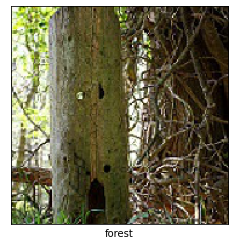

In [93]:
plt.imshow(test_ds[50])
plt.xlabel(labels[predict[50]])
plt.xticks([])
plt.yticks([])
plt.show()

### So, the model is predicting perfectly the classes of the new images.